AVG IID: 73.8505
AVG OOD: 34.720000000000006
MIN OOD: 4.903


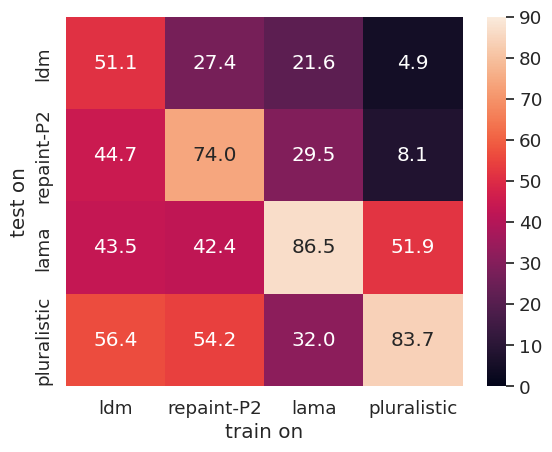

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Base path for score files
base_path = "results/"
runs_common_name = "test"

# Initialize dataset names
datasets = ["ldm", "repaint-p2-9k", "lama", "pluralistic"]

# Initialize the data dictionary to store IOU scores
data = {dataset: {} for dataset in datasets}

# Function to read and process the scores from file
def process_scores(file_path, dataset, test_datasets):
    try:
        with open(file_path, "r") as file:
            for idx, line in enumerate(file):
                if idx == 0:
                    continue
                parts = line.split()
                other_dataset = parts[0][:-1]
                if other_dataset not in test_datasets:
                    continue
                iou = float(parts[1])
                data[dataset][other_dataset] = iou
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        for d in test_datasets:
            data[dataset][d] = 0
    # Reorder the dictionary according to the test_datasets order
    data[dataset] = {key: data[dataset][key] for key in test_datasets}

# Process each dataset
for dataset in datasets:
    file_path = f"{base_path}{dataset}_{runs_common_name}/scores.txt"
    process_scores(file_path, dataset, datasets)

# Calculate average ID and OOD scores
avg_iid = sum(data[dataset][dataset] for dataset in datasets) / len(datasets)

total_values = []
min_ood = float('inf')

for i, dataset in enumerate(datasets):
    for j, other_dataset in enumerate(datasets):
        if i != j:
            total_values.append(data[dataset][other_dataset])
            min_ood = min(min_ood, data[dataset][other_dataset])

avg_ood = sum(total_values) / len(total_values)

print("AVG IID:", avg_iid)
print("AVG OOD:", avg_ood)
print("MIN OOD:", min_ood)

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Plot the heatmap
sns.set(font_scale=1.2)
heatmap = sns.heatmap(df, annot=True, fmt='.1f', vmin=0, vmax=90)
heatmap.set(xlabel='train on', ylabel='test on')

plt.show()
